![DME Layers](https://opg.optica.org/getImage.cfm?img=M3cuZnVsbCxib2UtNi00LTExNzItZzAwMw&article=boe-6-4-1172-g003)

-----

![RTA Layers Image](https://journals.plos.org/plosone/article/figure/image?size=large&id=10.1371/journal.pone.0133908.g001) | ![RTA Layers Explanation](https://journals.plos.org/plosone/article/figure/image?size=large&id=10.1371/journal.pone.0133908.t001)
-- | --

![AMD Layers](https://www.ncbi.nlm.nih.gov/pmc/articles/instance/3901571/bin/nihms-508161-f0001.jpg)

----

![AROI Layers](https://ipg.fer.hr/images/50037599/nasa%20baza.png)

In [2]:
import sys
sys.path.append('..')

%load_ext autoreload
%autoreload 2

In [3]:
import idp_utils.data_handling.constants as C
%cd $C.ROOT_PATH

/mnt/data/shen/archive/oct


In [4]:
%matplotlib inline 

import os
import re
import copy
from glob import glob
import pathlib
from pathlib import Path
import random
import shutil
import numpy as np
from tqdm import tqdm
from matplotlib import pyplot as plt
import scipy.io
import imageio
import cv2
from PIL import Image

from idp_utils.data_handling.common import (extract_data,
                                            extract_data_aroi,
                                            extract_data_op,
                                            get_dme_valid_idx,
                                            get_amd_valid_idx,
                                            prepare_files)
from idp_utils.data_handling.ulabel import unified_label as U
from idp_utils.data_handling.ulabel import diff_label as D

seed = 6
random.seed(seed)

In [5]:
from idp_utils.data_handling.ulabel import (Label, unified_label, unify_label, aroi_label, op_label)

# 1 Extract Labeled Layeres & Bscans from Data

## 1.1 Original Data

### 1.1.1 RTA

In [ ]:
data, dtype = "RTA", "original"
extract_data(file_pattern=os.path.join(C.RAW_DATA_PATTERN.format(data=data), "*.mat"), 
                   bscan_key='volumedata', 
                   layermap_key='Observer2',
                   bscan_format='hws',
                   layermap_format='wsl',
                   layer_labels=C.RTA_LABELS,
                   bscan_folder=C.BSCAN_PATTERN.format(data=data),
                   layer_folder=C.LAYER_PATTERN.format(data=data, dtype=dtype),
                   overwrite=True)

### 1.1.2 DME

In [ ]:
data, dtype = "DME", "original"
extract_data(file_pattern=os.path.join(C.RAW_DATA_PATTERN.format(data=data), "*.mat"),
                   bscan_key='images',
                   layermap_key='manualLayers1',
                   fluid_key='manualFluid1',
                   bscan_format='hws',
                   layermap_format='lws',
                   layer_labels=C.DME_LABELS,
                   bscan_folder=C.BSCAN_PATTERN.format(data=data),
                   layer_folder=C.LAYER_PATTERN.format(data=data, dtype=dtype),
                   fluid_folder=C.FLUID_PATTERN.format(data=data),
                   valid_slice_indices_fn=get_dme_valid_idx,
                   overwrite=True)

### 1.1.3 AMD

In [ ]:
# Control data
data, dtype = "AMD", "original"
extract_data(file_pattern=os.path.join(C.RAW_DATA_PATTERN.format(data=data), 'Control 2/Control 2/*.mat'), 
            bscan_key='images',
            layermap_key='layerMaps',
            bscan_format='hws',
            layermap_format='swl',
            layer_labels=[1, 3, 5], #C.AMD_LABELS
            bscan_folder=C.BSCAN_PATTERN.format(data=data),
            layer_folder=C.LAYER_PATTERN.format(data=data, dtype=dtype),
            valid_slice_indices_fn=get_amd_valid_idx,
            overwrite=False,
            save_extension='png')

In [ ]:
# AMD data
data, dtype = "AMD", "original"
extract_data(file_pattern=os.path.join(C.RAW_DATA_PATTERN.format(data=data),'AMD 2/AMD 2/*.mat'), 
            bscan_key='images',
            layermap_key='layerMaps',
            bscan_format='hws',
            layermap_format='swl',
            layer_labels=[1, 3, 5], #C.AMD_LABELS
            bscan_folder=C.BSCAN_PATTERN.format(data=data),
            layer_folder=C.LAYER_PATTERN.format(data=data, dtype=dtype),
            valid_slice_indices_fn=get_amd_valid_idx,
            overwrite=False,
            save_extension='png')

In [ ]:
# !rm -rf data/extract/bscans/AMD
# !rm -rf data/extract/layers/AMD

### 1.1.4 AROI

In [ ]:
# from PIL import Image
# m = 'data/raw/AROI/24 patient/patient10/mask/number/patient10_raw0040.png'
# img = np.asarray(Image.open(m))
# np.unique(img)
## output:
# array([0, 1, 2, 3, 4, 6], dtype=uint8)

In [ ]:
data, dtype = "AROI", "original"
extract_data_aroi(raw_data_folder=C.RAW_DATA_PATTERN.format(data=data),
                    bscan_folder=C.BSCAN_PATTERN.format(data=data),
                    layer_folder=C.LAYER_PATTERN.format(data=data, dtype=dtype),
                    fluid_folder=C.FLUID_PATTERN.format(data=data),
                    dtype=dtype,
                    fluid_labels=[0, 0, 0],
                    layer_labels=[U.ilm, U.ipl, U.rpe, U.bm])

#### 1.1.4.1 AROI Hetero

We create another AROI dataset that use a totally different set of notations than OP. This is for a later experiment.

In [17]:
data, dtype = "AROI", "hetero"

extract_data_aroi(raw_data_folder=C.RAW_DATA_PATTERN.format(data=data),
                        bscan_folder=C.BSCAN_PATTERN.format(data=data),
                        layer_folder=C.LAYER_PATTERN.format(data=data, dtype=dtype),
                        fluid_folder=C.FLUID_PATTERN.format(data=data),
                        dtype=dtype,
                        fluid_labels=[0, 0, 0], # remove fluid
                        layer_labels=[D.ilm, U.ipl, D.rpe, U.bm])

Created folder data/extract/layers/AROI/hetero


  2%|▏         | 27/1105 [00:14<10:07,  1.77it/s]

Error occurred when detecting edges data/raw/AROI/24 patient/patient14/mask/number/patient14_raw0075.png


 35%|███▍      | 385/1105 [01:38<02:57,  4.06it/s]

Error occurred when detecting edges data/raw/AROI/24 patient/patient5/mask/number/patient5_raw0067.png
Error occurred when detecting edges data/raw/AROI/24 patient/patient5/mask/number/patient5_raw0064.png


 35%|███▌      | 387/1105 [01:39<04:05,  2.92it/s]

Error occurred when detecting edges data/raw/AROI/24 patient/patient5/mask/number/patient5_raw0065.png


 36%|███▌      | 395/1105 [01:40<01:39,  7.15it/s]

Error occurred when detecting edges data/raw/AROI/24 patient/patient5/mask/number/patient5_raw0066.png


 83%|████████▎ | 915/1105 [04:08<00:48,  3.90it/s]

Error occurred when detecting edges data/raw/AROI/24 patient/patient10/mask/number/patient10_raw0070.png


 88%|████████▊ | 976/1105 [04:29<01:03,  2.02it/s]

Error occurred when detecting edges data/raw/AROI/24 patient/patient10/mask/number/patient10_raw0068.png


 89%|████████▉ | 983/1105 [04:30<00:19,  6.29it/s]

Error occurred when detecting edges data/raw/AROI/24 patient/patient10/mask/number/patient10_raw0069.png


 96%|█████████▌| 1057/1105 [04:50<00:06,  7.31it/s]

Error occurred when detecting edges data/raw/AROI/24 patient/patient11/mask/number/patient11_raw0069.png


100%|██████████| 1105/1105 [05:00<00:00,  3.68it/s]

Sum of skipped files:  9


In [7]:
# Make the hetero have the same test data
# from glob import glob

# aroi = {}
# for split in ['train', 'val', 'test']:
#     files = glob(f'data/splits/AROI/bscans/{split}/*')
#     aroi[split] = [f.split('/')[-1] for f in files]
    
# aroi_hetero_root = {
#     'bscans': 'data/splits/AROI_H/bscans/all',
#     'labels': 'data/splits/AROI_H/labels/all',
# }
# for file_type in ['bscans', 'labels']:
#     for split in ['train', 'val', 'test']:
#         files = glob(f'{aroi_hetero_root[file_type]}/*')
#         for f in files:
#             if f.split('/')[-1] in aroi[split]:
#                 shutil.copy(f, f'data/splits/AROI_H/{file_type}/{split}/')

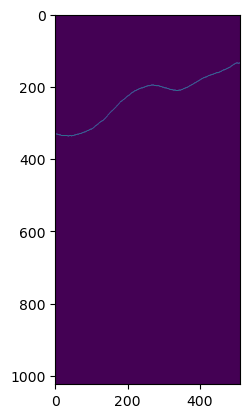

In [83]:
label = np.asarray(Image.open('/mnt/data/shen/archive/oct/data/splits/AROI_H/labels/val/patient1_raw0075.png'))
plt.imshow(label == D.ilm)

### 1.1.5 OP

In [52]:
data, dtype = "OP", "original"
name = "original"

extract_data_op(raw_data_folder=C.RAW_DATA_PATTERN.format(data=data),
                bscan_folder=C.BSCAN_PATTERN.format(data=data),
                layer_folder=C.LAYER_PATTERN.format(data=data, dtype=dtype),
                layer_labels=[U.ilm, U.rpe],
                instrument_labels=[U.instrument, U.mirror],
                save_extension='png')

Part1 Started


100%|██████████| 47/47 [06:15<00:00,  8.00s/it]


Part2 Started


100%|██████████| 47/47 [06:35<00:00,  8.41s/it]


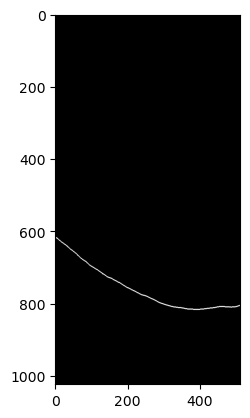

In [58]:
label = np.array(Image.open('data/extract/layers/OP/original/0c3839cd-0aa9-4e6e-bd4e-eb8f0520e2056578-002.png'))
plt.imshow(label == U.rpe, cmap='gray')

In [ ]:
import os
import re
import copy
from glob import glob
import pathlib
from pathlib import Path
import random
import shutil
import numpy as np
from tqdm import tqdm
from matplotlib import pyplot as plt
import scipy.io
import imageio
import cv2
import torch
from PIL import Image
from idp_utils.data_handling.constants import (INSTRUMENT_LABELS, 
                                               BSCAN_PATTERN,
                                               LAYER_PATTERN,
                                               FLUID_PATTERN,
                                               FLUID_LABELS,
                                               AROI_LABEL_DICT)

In [ ]:
def extract_data_op(raw_data_folder, bscan_folder, layer_folder, layer_labels, instrument_labels=None, save_extension='png'):

    raw_layer_labels = [1, 3]
    raw_instrument_labels = [2, 4]

    if not Path(bscan_folder).exists():
        Path(bscan_folder).mkdir(parents=True)
        print(f"Created folder {bscan_folder}")

    if not Path(layer_folder).exists():
        Path(layer_folder).mkdir(parents=True)
        print(f"Created folder {layer_folder}")

    parts = glob(os.path.join(raw_data_folder, "*"))
    for part in parts:
        print(f"{part.split('/')[-1]} Started")
        folders = glob(os.path.join(part, "*"))
        for folder in tqdm(folders):
            folder_name = folder.split('/')[-1].split('.')[0]
            bscans = glob(os.path.join(folder, "[0-9]*.bmp"))
            layers = glob(os.path.join(folder, "segmentation", "[0-9]*.bmp"))
            assert len(bscans) !=0 and len(layers) != 0 and len(bscans) == len(layers)

            for layer in layers:
                layer_name = folder_name + "-" + layer.split('/')[-1].split('.')[0] + '.' + save_extension
                layer_arr = np.asarray(Image.open(layer))
                # for i in range(2):
                #     layer_arr[layer_arr == raw_layer_labels[i]] = layer_labels[i]
                # if instrument_labels:
                #     assert len(instrument_labels) >= len(raw_instrument_labels), \
                #         f"instrument_labels ({len(instrument_labels)}) is not enough (expect {len(raw_instrument_labels)})"
                #     for i in range(2):
                #         layer_arr[layer_arr == raw_instrument_labels[i]] = instrument_labels[i]
                # else:
                #     layer_arr[layer_arr == raw_instrument_labels[i]] = INSTRUMENT_LABELS[i]
                layer_img = Image.fromarray(layer_arr)
                layer_img.save(os.path.join(layer_folder, layer_name))
            
            for bscan in bscans:
                bscan_name = folder_name + "-" + bscan.split('/')[-1].split('.')[0] + '.' + save_extension
                bscan_arr = np.asarray(Image.open(bscan))
                bscan_img = Image.fromarray(bscan_arr)
                bscan_img.save(os.path.join(bscan_folder, bscan_name))

In [ ]:
data, dtype = "iOCT", "original"
name = "original"

extract_data_op(raw_data_folder=C.RAW_DATA_PATTERN.format(data="OP"),
                bscan_folder=C.BSCAN_PATTERN.format(data=data),
                layer_folder=C.LAYER_PATTERN.format(data=data, dtype=dtype),
                layer_labels=[1,2],
                instrument_labels=[3,4],
                save_extension='png')

In [ ]:
import imageio
import numpy as np
from glob import glob

test_layers = glob(C.LAYER_PATTERN.format(data=data, dtype=dtype) + '/*.png')
print(len(test_layers))
layer = test_layers[0]

In [ ]:
im = imageio.imread(layer)
np.unique(im)

## 1.2 Reduced-Layer Data

### 1.2.1 RTA

In [ ]:
# data = "RTA"
# extract_data(file_pattern=os.path.join(C.RAW_DATA_PATTERN.format(data=data),'Subject[78]*.mat'), 
#                    bscan_key='volumedata', 
#                    layermap_key='Observer2',
#                    bscan_format='hws',
#                    layermap_format='wsl',
#                    layer_labels=C.RTA_LABELS,
#                    bscan_folder=C.BSCAN_PATTERN.format(data=data),
#                    layer_folder=C.LAYER_PATTERN.format(data=data, dtype='reduce1'),
#                    remove_from=range(2,8), # 6 out of 8
#                    n_remove=1)
# extract_data(file_pattern=os.path.join(C.RAW_DATA_PATTERN.format(data=data),'Subject[56]*.mat'), 
#                    bscan_key='volumedata', 
#                    layermap_key='Observer2',
#                    bscan_format='hws',
#                    layermap_format='wsl',
#                    layer_labels=C.RTA_LABELS,
#                    bscan_folder=C.BSCAN_PATTERN.format(data=data),
#                    layer_folder=C.LAYER_PATTERN.format(data=data, dtype='reduce2'),
#                    remove_from=range(2,8), # 6 out of 8
#                    n_remove=2)
# extract_data(file_pattern=os.path.join(C.RAW_DATA_PATTERN.format(data=data),'Subject[34]*.mat'), 
#                    bscan_key='volumedata', 
#                    layermap_key='Observer2',
#                    bscan_format='hws',
#                    layermap_format='wsl',
#                    layer_labels=C.RTA_LABELS,
#                    bscan_folder=C.BSCAN_PATTERN.format(data=data),
#                    layer_folder=C.LAYER_PATTERN.format(data=data, dtype='reduce3'),
#                    remove_from=range(2,8), # 6 out of 8
#                    n_remove=3)
# extract_data(file_pattern=os.path.join(C.RAW_DATA_PATTERN.format(data=data),'Subject[12]*.mat'), 
#                    bscan_key='volumedata', 
#                    layermap_key='Observer2',
#                    bscan_format='hws',
#                    layermap_format='wsl',
#                    layer_labels=C.RTA_LABELS,
#                    bscan_folder=C.BSCAN_PATTERN.format(data=data),
#                    layer_folder=C.LAYER_PATTERN.format(data=data, dtype='reduce4'),
#                    remove_from=range(2,8), # 6 out of 8
#                    n_remove=4)
# extract_data(file_pattern=os.path.join(C.RAW_DATA_PATTERN.format(data=data),'Subject[12]*.mat'), 
#                    bscan_key='volumedata', 
#                    layermap_key='Observer2',
#                    bscan_format='hws',
#                    layermap_format='wsl',
#                    layer_labels=C.RTA_LABELS,
#                    bscan_folder=C.BSCAN_PATTERN.format(data=data),
#                    layer_folder=C.LAYER_PATTERN.format(data=data, dtype='reduce5'),
#                    remove_from=range(2,8), # 6 out of 8
#                    n_remove=5)

### 1.2.2 DME

In [ ]:
# data = "DME"
# extract_data(file_pattern=os.path.join(C.RAW_DATA_PATTERN.format(data=data),'Subject_0[89].mat'),
#                    bscan_key='images',
#                    layermap_key='manualLayers1',
#                    fluid_key='manualFluid1',
#                    bscan_format='hws',
#                    layermap_format='lws',
#                    layer_labels=C.DME_LABELS,
#                    bscan_folder=C.BSCAN_PATTERN.format(data=data),
#                    layer_folder=C.LAYER_PATTERN.format(data=data, dtype='reduce1'),
#                    fluid_folder=C.FLUID_PATTERN.format(data=data),
#                    valid_slice_indices_fn=get_dme_valid_idx,
#                    remove_from=range(2,8), # DME also has 8 layers, we choose 6 out of 8
#                    n_remove=1)
# extract_data(file_pattern=os.path.join(C.RAW_DATA_PATTERN.format(data=data),'Subject_0[67].mat'),
#                    bscan_key='images',
#                    layermap_key='manualLayers1',
#                    fluid_key='manualFluid1',
#                    bscan_format='hws',
#                    layermap_format='lws',
#                    layer_labels=C.DME_LABELS,
#                    bscan_folder=C.BSCAN_PATTERN.format(data=data),
#                    layer_folder=C.LAYER_PATTERN.format(data=data, dtype='reduce2'),
#                    fluid_folder=C.FLUID_PATTERN.format(data=data),
#                    valid_slice_indices_fn=get_dme_valid_idx,
#                    remove_from=range(2,8), # DME also has 8 layers, we choose 6 out of 8
#                    n_remove=2)
# extract_data(file_pattern=os.path.join(C.RAW_DATA_PATTERN.format(data=data),'Subject_0[45].mat'),
#                    bscan_key='images',
#                    layermap_key='manualLayers1',
#                    fluid_key='manualFluid1',
#                    bscan_format='hws',
#                    layermap_format='lws',
#                    layer_labels=C.DME_LABELS,
#                    bscan_folder=C.BSCAN_PATTERN.format(data=data),
#                    layer_folder=C.LAYER_PATTERN.format(data=data, dtype='reduce3'),
#                    fluid_folder=C.FLUID_PATTERN.format(data=data),
#                    valid_slice_indices_fn=get_dme_valid_idx,
#                    remove_from=range(2,8), # DME also has 8 layers, we choose 6 out of 8
#                    n_remove=3)
# extract_data(file_pattern=os.path.join(C.RAW_DATA_PATTERN.format(data=data),'Subject_0[23].mat'),
#                    bscan_key='images',
#                    layermap_key='manualLayers1',
#                    fluid_key='manualFluid1',
#                    bscan_format='hws',
#                    layermap_format='lws',
#                    layer_labels=C.DME_LABELS,
#                    bscan_folder=C.BSCAN_PATTERN.format(data=data),
#                    layer_folder=C.LAYER_PATTERN.format(data=data, dtype='reduce4'),
#                    fluid_folder=C.FLUID_PATTERN.format(data=data),
#                    valid_slice_indices_fn=get_dme_valid_idx,
#                    remove_from=range(2,8), # DME also has 8 layers, we choose 6 out of 8
#                    n_remove=4)

### 1.2.3 AMD

There are only 3 layers within it. Let it go.

### 1.2.4 AROI

In [ ]:
data = 'AROI'
dtype = 'reduce1'
extract_data_aroi(raw_data_folder=C.RAW_DATA_PATTERN.format(data=data),
                 bscan_folder=C.BSCAN_PATTERN.format(data=data),
                 layer_folder=C.LAYER_PATTERN.format(data=data, dtype=dtype),
                 fluid_folder=C.FLUID_PATTERN.format(data=data),
                 dtype=dtype,
                 fluid_labels=C.FLUID_LABELS,
                 layer_labels=C.AROI_LABELS,
                 remove_from=range(1,3),
                 n_remove=1)

# 2 Split Data into train, val and test

## 2.1 Original Data

### 2.1.1 RTA

In [ ]:
data, dtype = "RTA", "original"
name = "original"

prepare_files(data=data, 
              dst_folder=C.SPLIT_PATTERN.format(data=data, name=name), 
              train_ratio=0.8, 
              test_ratio=0.1,
              with_fluids=False,
              dtype=dtype  )

### 2.1.2 DME

Just a backup for original code
```python
bscan_files = glob(C.DME_BSCAN_ORIGINAL_FOLDER + '*.jpg')
assert len(bscan_files) != 0

train_files, test_files, val_files = split_files(bscan_files, 0.8, 0.1)
assert len(train_files) != 0, f"train_files is empty, data may have already been moved"

splited_files = {
    'train': train_files,
    'test': test_files,
    'val': val_files
}
move_files(splited_files, C.DME_LAYER_BSCAN_ORIGINAL_ROOT, C.DME_SPLIT_ORIGINAL_FOLDER)
```

In [ ]:
data, dtype = "DME", "original"
name = "original"

prepare_files(data=data, 
              dst_folder=C.SPLIT_PATTERN.format(data=data, name=name), 
              train_ratio=0.8, 
              test_ratio=0.1,
              with_fluids=True,
              dtype=dtype)

### 2.1.3 AMD

In [ ]:
data, dtype = "AMD", "original"
name = "original"

prepare_files(data=data, 
              dst_folder=C.SPLIT_PATTERN.format(data=data, name=name), 
              train_ratio=0.8, 
              test_ratio=0.1,
              with_fluids=False,
              dtype=dtype,
              extension='png')

Copy files to another project:

In [ ]:
%%bash

for f in /home/extra/micheal/IDP/data/splits/AMD/original/bscans/train/*; do ln "$f" /home/extra/micheal/pixel2style2pixel/data/amd/bscans/train/; done
ln /home/extra/micheal/IDP/data/splits/AMD/original/bscans/val/* /home/extra/micheal/pixel2style2pixel/data/amd/bscans/val/
ln /home/extra/micheal/IDP/data/splits/AMD/original/bscans/test/* /home/extra/micheal/pixel2style2pixel/data/amd/bscans/test/
for f in ln /home/extra/micheal/IDP/data/splits/AMD/original/labels/train/*; do ln "$f" /home/extra/micheal/pixel2style2pixel/data/amd/labels/train/; done
ln /home/extra/micheal/IDP/data/splits/AMD/original/labels/val/* /home/extra/micheal/pixel2style2pixel/data/amd/labels/val/
ln /home/extra/micheal/IDP/data/splits/AMD/original/labels/test/* /home/extra/micheal/pixel2style2pixel/data/amd/labels/test/

### 2.1.4 AROI

In [21]:
data, dtype = "AROI", "original"
name = "original"

prepare_files(data=data, 
              dst_folder=C.SPLIT_PATTERN.format(data=data, name=name), 
              train_ratio=0.8, 
              test_ratio=0.1,
              with_fluids=True,
              dtype=dtype,
              extension='png')

[INFO] 1096 files matches pattern data/extract/bscans/AROI/*.png
Preparing train files:
created dst label folder data/splits/AROI/labels/train
created dst bscan folder data/splits/AROI/bscans/train


100%|██████████| 876/876 [00:11<00:00, 77.63it/s]


Preparing test files:
created dst label folder data/splits/AROI/labels/test
created dst bscan folder data/splits/AROI/bscans/test


100%|██████████| 109/109 [00:01<00:00, 74.06it/s]


Preparing val files:
created dst label folder data/splits/AROI/labels/val
created dst bscan folder data/splits/AROI/bscans/val


100%|██████████| 111/111 [00:03<00:00, 29.38it/s]


#### 2.1.4.1 AROI Hetero

In [22]:
data, dtype = "AROI", "hetero"
name = "hetero"

prepare_files(data=data, 
              dst_folder=C.SPLIT_PATTERN.format(data=data, name=name), 
              train_ratio=0.8, 
              test_ratio=0.1,
              with_fluids=True,
              dtype=dtype,
              extension='png')

[INFO] 1096 files matches pattern data/extract/layers/AROI/hetero/*.png
Preparing train files:
created dst label folder data/splits/AROI/labels/train
created dst bscan folder data/splits/AROI/bscans/train


100%|██████████| 876/876 [00:16<00:00, 51.91it/s]


Preparing test files:
created dst label folder data/splits/AROI/labels/test
created dst bscan folder data/splits/AROI/bscans/test


100%|██████████| 109/109 [00:01<00:00, 72.63it/s]


Preparing val files:
created dst label folder data/splits/AROI/labels/val
created dst bscan folder data/splits/AROI/bscans/val


100%|██████████| 111/111 [00:01<00:00, 73.61it/s]


### 2.1.5 OP

In [59]:
data, dtype = "OP", "original"
name = "original"

prepare_files(data=data, 
              dst_folder=C.SPLIT_PATTERN.format(data="ioct", name=name), 
              train_ratio=0.8, 
              test_ratio=0.1,
              with_fluids=False,
              dtype=dtype,
              extension='png')

[INFO] 12025 files matches pattern data/extract/bscans/OP/*.png
Preparing train files:
created dst label folder data/splits/ioct/labels/train
created dst bscan folder data/splits/ioct/bscans/train


100%|██████████| 9620/9620 [00:13<00:00, 696.43it/s] 


Preparing test files:
created dst label folder data/splits/ioct/labels/test
created dst bscan folder data/splits/ioct/bscans/test


100%|██████████| 1202/1202 [00:01<00:00, 1174.81it/s]


Preparing val files:
created dst label folder data/splits/ioct/labels/val
created dst bscan folder data/splits/ioct/bscans/val


100%|██████████| 1203/1203 [00:00<00:00, 1362.90it/s]


### FILTER OUT OP DATA WITHOUT INSTRUMENTS

In [64]:
files_to_keep = set()
from glob import glob
import numpy as np
split = "val"
files = glob(f"data/splits/ioct/labels/{split}/*")
for f in tqdm(files):
    label = Image.open(f)
    if U.instrument in np.unique(label):
        files_to_keep.add(f)

100%|██████████| 1203/1203 [00:23<00:00, 52.03it/s]


In [65]:
import os

print(len(files_to_keep))
new_folder = 'OP_I'
!mkdir -p data/splits/$new_folder/labels/$split
!mkdir -p data/splits/$new_folder/bscans/$split
files_to_keep = [f.split("/")[-1] for f in files_to_keep]
for f in files_to_keep:
    old_label = f"data/splits/ioct/labels/{split}/{f}"
    old_bscan = f"data/splits/ioct/bscans/{split}/{f}"
    new_label = f"data/splits/OP_I/labels/{split}/{f}"
    new_bscan = f"data/splits/OP_I/bscans/{split}/{f}"
    os.link(old_label, new_label,)
    os.link(old_bscan, new_bscan)

305


## 2.2 Reduced-Layer Data

### 2.2.1 RTA

just another backup:
```python
bscan_files = glob(C.RTA_BSCAN_REDUCED_FOLDER+'*.jpg')
print(len(bscan_files))

train_files, test_files, val_files = split_files(bscan_files, 0.8, 0.1)
assert len(train_files) != 0, f"train_files is empty, data may have already been moved"

splited_files = {
    'train': train_files,
    'test': test_files,
    'val': val_files
}
move_files(splited_files, C.RTA_LAYER_BSCAN_REDUCED_ROOT, C.RTA_SPLIT_REDUCED_FOLDER)
```

In [ ]:
# data = "RTA"
# name = "reduce_merge"

# prepare_files(data=data, 
#               dst_folder=C.SPLIT_PATTERN.format(data=data, name=name), 
#               train_ratio=0.8, 
#               test_ratio=0.1,
#               with_fluids=False,
#               dtype="reduce1", 
#               merge_original=True)
# prepare_files(data=data, 
#               dst_folder=C.SPLIT_PATTERN.format(data=data, name=name), 
#               train_ratio=0.8, 
#               test_ratio=0.1,
#               with_fluids=False,
#               dtype="reduce2", 
#               merge_original=True)
# prepare_files(data=data, 
#               dst_folder=C.SPLIT_PATTERN.format(data=data, name=name), 
#               train_ratio=0.8, 
#               test_ratio=0.1,
#               with_fluids=False,
#               dtype="reduce3", 
#               merge_original=True)
# prepare_files(data=data, 
#               dst_folder=C.SPLIT_PATTERN.format(data=data, name=name), 
#               train_ratio=0.8, 
#               test_ratio=0.1,
#               with_fluids=False,
#               dtype="reduce4", 
#               merge_original=True)
# prepare_files(data=data, 
#               dst_folder=C.SPLIT_PATTERN.format(data=data, name=name), 
#               train_ratio=0.8, 
#               test_ratio=0.1,
#               with_fluids=False,
#               dtype="reduce5", 
#               merge_original=True)

### 2.2.2 DME

In [ ]:
# data = "DME"
# name = "reduce_merge"

# prepare_files(data=data, 
#               dst_folder=C.SPLIT_PATTERN.format(data=data, name=name), 
#               train_ratio=0.8, 
#               test_ratio=0.1,
#               with_fluids=True,
#               dtype="reduce1", 
#               merge_original=True)
# prepare_files(data=data, 
#               dst_folder=C.SPLIT_PATTERN.format(data=data, name=name), 
#               train_ratio=0.8, 
#               test_ratio=0.1,
#               with_fluids=True,
#               dtype="reduce2", 
#               merge_original=True)
# prepare_files(data=data, 
#               dst_folder=C.SPLIT_PATTERN.format(data=data, name=name), 
#               train_ratio=0.8, 
#               test_ratio=0.1,
#               with_fluids=True,
#               dtype="reduce3", 
#               merge_original=True)
# prepare_files(data=data, 
#               dst_folder=C.SPLIT_PATTERN.format(data=data, name=name), 
#               train_ratio=0.8, 
#               test_ratio=0.1,
#               with_fluids=True,
#               dtype="reduce4", 
#               merge_original=True)

### 2.2.3 AROI

In [ ]:
data, dtype = "AROI", "reduce1"
name = "reduce1_merge"
merge_original = True

prepare_files(data=data, 
              dst_folder=C.SPLIT_PATTERN.format(data=data, name=name), 
              train_ratio=0.8, 
              test_ratio=0.1,
              with_fluids=True,
              dtype=dtype, 
              merge_original=merge_original,
              extension='png')

# 3 Create pix2pix Compatible Datasets

## 3.1 Original Data

### 3.1.1 RTA

In [ ]:
label_folder = C.SPLIT_PATTERN.format(data='RTA', name='original') + '/labels'
bscan_folder = C.SPLIT_PATTERN.format(data='RTA', name='original') + '/bscans'
dataset_folder = C.DATASET_PATTERN.format(data='RTA', name='original')
!python pytorch-CycleGAN-and-pix2pix/datasets/combine_A_and_B.py --fold_A $label_folder --fold_B $bscan_folder --fold_AB $dataset_folder

### 3.1.2 DME

In [ ]:
label_folder = C.SPLIT_PATTERN.format(data='DME', name='original') + '/labels'
bscan_folder = C.SPLIT_PATTERN.format(data='DME', name='original') + '/bscans'
dataset_folder = C.DATASET_PATTERN.format(data='DME', name='original')
!python pytorch-CycleGAN-and-pix2pix/datasets/combine_A_and_B.py \
    --fold_A $label_folder \
    --fold_B $bscan_folder \
    --fold_AB $dataset_folder

### 3.1.3 AMD

In [ ]:
label_folder = C.SPLIT_PATTERN.format(data='AMD', name='original') + '/labels'
bscan_folder = C.SPLIT_PATTERN.format(data='AMD', name='original') + '/bscans'
dataset_folder = C.DATASET_PATTERN.format(data='AMD', name='original')
!python pytorch-CycleGAN-and-pix2pix/datasets/combine_A_and_B.py --fold_A $label_folder --fold_B $bscan_folder --fold_AB $dataset_folder

In [ ]:
# delete generated AMD datasets
!rm $dataset_folder/test/Farsiu_*
!rm $dataset_folder/train/Farsiu_*
!rm $dataset_folder/val/Farsiu_*

### 3.1.4 AROI

In [71]:
label_folder = C.SPLIT_PATTERN.format(data='AROI', name='original') + '/labels'
bscan_folder = C.SPLIT_PATTERN.format(data='AROI', name='original') + '/bscans'
dataset_folder = C.DATASET_PATTERN.format(data='AROI', name='original')
!python submodules/pix2pix/datasets/combine_A_and_B.py \
    --fold_A $label_folder \
    --fold_B $bscan_folder \
    --fold_AB $dataset_folder

[fold_A] =  data/splits/AROI//labels
[fold_B] =  data/splits/AROI//bscans
[fold_AB] =  data/datasets/AROI
[num_imgs] =  1000000
[use_AB] =  False
[no_multiprocessing] =  False
[grayscale] =  False
split = train, use 876/876 images
split = train, number of images = 876
split = test, use 109/109 images
split = test, number of images = 109
split = val, use 111/111 images
split = val, number of images = 111


#### 3.1.4.1 AROI Hetero

In [72]:
label_folder = C.SPLIT_PATTERN.format(data='AROI_H', name='hetero') + '/labels'
bscan_folder = C.SPLIT_PATTERN.format(data='AROI_H', name='hetero') + '/bscans'
dataset_folder = C.DATASET_PATTERN.format(data='AROI_H', name='hetero')
!python submodules/pix2pix/datasets/combine_A_and_B.py \
    --fold_A $label_folder \
    --fold_B $bscan_folder \
    --fold_AB $dataset_folder

[fold_A] =  data/splits/AROI_H//labels
[fold_B] =  data/splits/AROI_H//bscans
[fold_AB] =  data/datasets/AROI_H
[num_imgs] =  1000000
[use_AB] =  False
[no_multiprocessing] =  False
[grayscale] =  False
split = train, use 876/876 images
split = train, number of images = 876
split = test, use 109/109 images
split = test, number of images = 109
split = val, use 111/111 images
split = val, number of images = 111


### 3.1.5 OP

In [73]:
label_folder = C.SPLIT_PATTERN.format(data='OP', name='original') + 'labels'
bscan_folder = C.SPLIT_PATTERN.format(data='OP', name='original') + 'bscans'
dataset_folder = C.DATASET_PATTERN.format(data='OP', name='original')
!python submodules/pix2pix/datasets/combine_A_and_B.py \
    --fold_A $label_folder \
    --fold_B $bscan_folder \
    --fold_AB $dataset_folder

[fold_A] =  data/splits/OP/labels
[fold_B] =  data/splits/OP/bscans
[fold_AB] =  data/datasets/OP
[num_imgs] =  1000000
[use_AB] =  False
[no_multiprocessing] =  False
[grayscale] =  False
Traceback (most recent call last):
  File "submodules/pix2pix/datasets/combine_A_and_B.py", line 29, in <module>
    splits = os.listdir(args.fold_A)
FileNotFoundError: [Errno 2] No such file or directory: 'data/splits/OP/labels'


## 3.2 Reduced-Layer Data

### 3.2.1 RTA

In [ ]:
# data, name = "RTA", "reduce_merge"
# bscan_folder = os.path.join(C.SPLIT_PATTERN.format(data=data, name=name), "bscans")
# label_folder = os.path.join(C.SPLIT_PATTERN.format(data=data, name=name), "labels")
# dataset_folder = C.DATASET_PATTERN.format(data=data, name=name)

# !python pytorch-CycleGAN-and-pix2pix/datasets/combine_A_and_B.py \
#     --fold_A $label_folder \
#     --fold_B $bscan_folder \
#     --fold_AB $dataset_folder

### 3.2.2 DME

In [ ]:
# data, name = "DME", "reduce_merge"
# bscan_folder = os.path.join(C.SPLIT_PATTERN.format(data=data, name=name), "bscans")
# label_folder = os.path.join(C.SPLIT_PATTERN.format(data=data, name=name), "labels")
# dataset_folder = C.DATASET_PATTERN.format(data=data, name=name)

# !python pytorch-CycleGAN-and-pix2pix/datasets/combine_A_and_B.py \
#     --fold_A $label_folder \
#     --fold_B $bscan_folder \
#     --fold_AB $dataset_folder

### 3.2.3 AROI

In [ ]:
data, name = "AROI", "reduce1_merge"

bscan_folder = os.path.join(C.SPLIT_PATTERN.format(data=data, name=name), "bscans")
label_folder = os.path.join(C.SPLIT_PATTERN.format(data=data, name=name), "labels")
dataset_folder = C.DATASET_PATTERN.format(data=data, name=name)

In [ ]:
!python pytorch-CycleGAN-and-pix2pix/datasets/combine_A_and_B.py \
    --fold_A "$label_folder" \
    --fold_B "$bscan_folder" \
    --fold_AB "$dataset_folder" 